# The Secrets to Happiness
### A report on World Happiness


Presented By: Kristine Cabanela

January 24, 2022


# Project Summary

### Goals
Our overall goal is to identify key drivers for happiness among a variation of countries around the world and predict happiness based on these key drivers.

### Project Description

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.

In this project, we will utilize the information in The World Happiness Report, explore key drivers of happiness by analyzing and making correlations with various (quality of) life factors, and then we will use machine learning to create a regression model that predicts happiness.

### Initial Questions

- What is the relationship between happiness and income (GDP)?

- What is the relationship between happiness and freedom?
    
- What is the relationship between happiness and perceptions of corruption?

- How different is happiness depending on the geographical region?

## Data Dictionary

| Variable            |     Description  |     
| ----------------    | ------------------ |
|Ladder score | Happiness score or subjective well-being. This is the national average response to the question of life evaluations |
|Logged GDP per capita | The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020 |
|Social support| Social support refers to assistance or support provided by members of social networks to an individual |
|Healthy life expectancy| Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year|
|Freedom to make life choices   | Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”|
|Generosity| Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita |
|Perceptions of corruption| The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”  |
|Ladder score in Dystopia| It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia |





### Imports
**Below are imports of python modules and/or libraries needed for this notebook to run properly**

In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
from env import host, user, password
from scipy import stats

from sklearn.model_selection import train_test_split


# modeling methods
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import requests
import wrangle


# Acquire and Prep - Wrangle

### Get data by 

In [2]:
# Acquired dataset from stored module and assigned as df

df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
# ratings for happiest vs unhappiest
maxScore = np.max(df["Ladder score"]);
minScore = np.min(df["Ladder score"]);
theHappiestCountry = df[df["Ladder score"] == maxScore]["Country name"];
theMostUnhappyCountry = df[df["Ladder score"] == minScore]["Country name"];

print("The Happiest Country: ", theHappiestCountry.values[0]);
print("The Most Unhappy Country: ", theMostUnhappyCountry.values[0]);



The Happiest Country:  Finland
The Most Unhappy Country:  Afghanistan


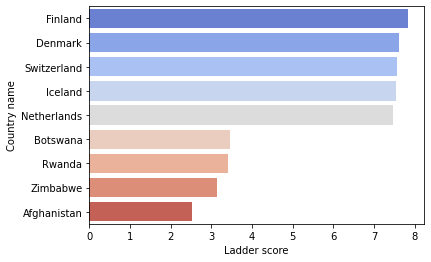

In [5]:
# visual for most happy, least happy
happinessFilter = (df.loc[:,"Ladder score"] > 7.4) | (df.loc[:, "Ladder score"] < 3.5);
sns.barplot(x = "Ladder score", y = "Country name", data = df[happinessFilter], palette = "coolwarm");

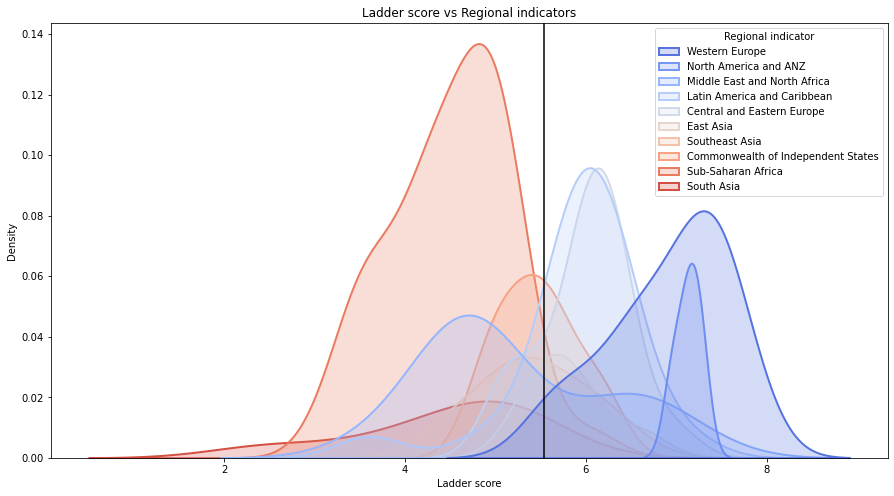

In [6]:
plt.figure(figsize = (15, 8));
sns.kdeplot(df["Ladder score"], hue = df["Regional indicator"], fill = True, linewidth = 2, palette = "coolwarm");
plt.axvline(df["Ladder score"].mean(), c = "black"); # Mean value of Ladder score
plt.title("Ladder score vs Regional indicators");

# Prepare
### Perform a data cleanup:
- To ensure that the data we are evaluating is at a high quality meaning it is free of incorrect, irrelevant, or incomplete information which will minimize the risk of wrong or inaccurate conclusions.

## Steps
- First, we will remove null values/duplicate values if any.
- We can also take out duplicate values.
- Removed columns upperwhisker and lowerwhisker

In [7]:
# view any null values

df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [8]:
# drop unneeded column
df.drop(columns = 'upperwhisker', inplace = True)


In [9]:
# drop unneeded column
df.drop(columns = 'lowerwhisker', inplace = True)


# Lets write a function for this
After preparing my dataset I've created a function to apply all the changes

In [10]:
def wrangle_happy():
    
    df = get_happy()
    
    # let's go ahead and drop the nulls
    df = df.dropna()
    df.isnull().sum()
    
    
    # upperwhisker can be dropped since this feature doesn't add to overall proj goal
    df.drop(columns = 'upperwhisker', inplace = True)

    
    # lowerwhisker can be dropped since this feature doesn't add to overall proj goal
    df.drop(columns = 'lowerwhisker', inplace = True)

    return df

In [11]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['Country name','Regional indicator']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["Country name", "Regional indicator"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,Country name_Zimbabwe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,...,0,0,0,0,0,0,0,0,0,1
1,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,...,0,0,0,0,0,0,0,0,0,1
2,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,...,0,0,0,0,0,0,0,0,0,1
3,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,...,0,0,0,0,0,0,0,0,0,1
4,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,...,0,0,0,0,0,0,0,0,0,1


# Let's split our data

In [12]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train.

train, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train, test_size = .3, random_state = 123)

In [13]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (83, 173)
validate -> (36, 173)
test -> (30, 173)


In [14]:
# Function created to split dataset

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames
    return train, validate, test DataFrames.
    '''
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    
    return train, validate, test

In [15]:
# apply split_data function to dataset

train, validate, test = split_data(df)

In [16]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (83, 173)
validate -> (36, 173)
test -> (30, 173)


In [17]:
# Rows and columns for train, validate, and test

train.shape, validate.shape, test.shape

((83, 173), (36, 173), (30, 173))

# Exploratory Analysis

### Question 1
- What is the relationship between happiness and income (GDP)?

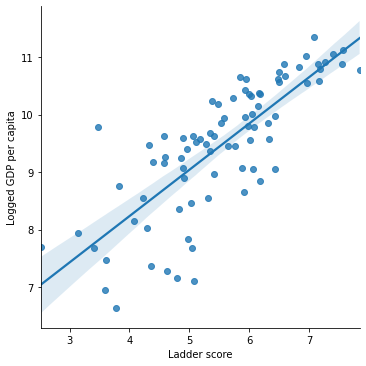

In [18]:
# plot data to visualize how happiness correlates to income


sns.lmplot(x='Ladder score', y='Logged GDP per capita', data=train)

In [20]:
alpha = 0.5

In [21]:
# statistical test

x = train['Ladder score']
y = train['Logged GDP per capita']

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('There is a correlation between beat clusters and popularity')
else:
    print('There is no correlation between beat clusters and popularity')

There is a correlation between beat clusters and popularity


### Question 2
- What is the relationship between happiness and freedom?

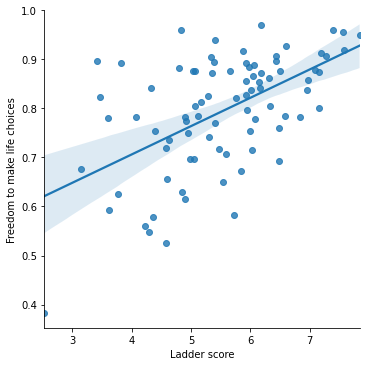

In [22]:
# plot data to visualize how happiness correlates to freedom

sns.lmplot(x='Ladder score', y='Freedom to make life choices', data=train)

In [23]:
# statistical test

x = train['Ladder score']
y = train['Freedom to make life choices']

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('There is a correlation between beat clusters and popularity')
else:
    print('There is no correlation between beat clusters and popularity')

There is a correlation between beat clusters and popularity


### Question 3

- What is the relationship between happiness and perceptions of corruption?

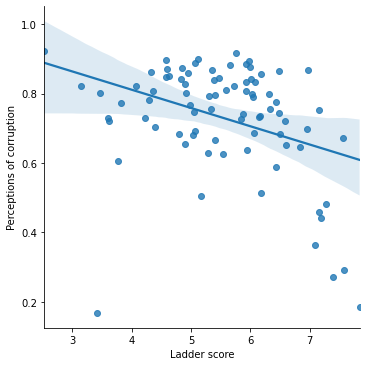

In [24]:
# plot data to visualize how happiness correlates to perceptions of corruption

sns.lmplot(x='Ladder score', y='Perceptions of corruption', data=train)

In [25]:
# statistical test

x = train['Ladder score']
y = train['Perceptions of corruption']

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('There is a correlation between beat clusters and popularity')
else:
    print('There is no correlation between beat clusters and popularity')

There is a correlation between beat clusters and popularity


### Question 4

- How different is happiness depending on the geographical region?

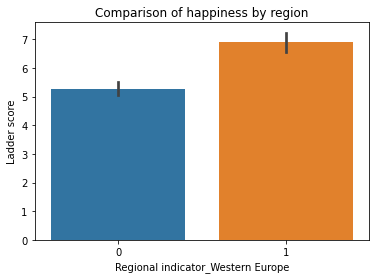

In [26]:
# plot data to visualize how happiness correlates to geographical region

sns.barplot(data = train, x = 'Regional indicator_Western Europe', y = abs(train['Ladder score']))
plt.title('Comparison of happiness by region');

# Explore Summary

Statistical analysis shows correlation between the clusters and target, as well as the audio features and target. All features can be used in modeling. SelectKBest's recommendation is also considered.




## Scale

In [27]:
def standard_scaler(train, validate, test):
    '''
    Takes train, validate, and test dataframes as arguments and returns
    standard scaler object and scaled versions of train, validate, and test.
    '''
    scaled_vars = list(train.select_dtypes('number').columns)
    scaled_column_names = [i for i in scaled_vars]
    scaler = sklearn.preprocessing.StandardScaler()
    train_scaled = scaler.fit_transform(train[scaled_vars])
    validate_scaled = scaler.transform(validate[scaled_vars])
    test_scaled = scaler.transform(test[scaled_vars])

    train_scaled = pd.DataFrame(train_scaled, columns=scaled_column_names, index=train.index.values)
    validate_scaled = pd.DataFrame(validate_scaled, columns=scaled_column_names, index=validate.index.values)
    test_scaled = pd.DataFrame(test_scaled, columns=scaled_column_names, index= test.index.values)
    return scaler, train_scaled, validate_scaled, test_scaled


# Model

In [28]:
X_train = train.drop(columns=['Ladder score'])
y_train = train['Ladder score']

X_validate = validate.drop(columns=['Ladder score'])
y_validate = validate['Ladder score']

X_test = test.drop(columns=['Ladder score',])
y_test = test['Ladder score']

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((83, 172), (83,), (30, 172), (30,))

### Baseline

In [30]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict pred_mean
pred_mean = y_train['Ladder score'].mean()
y_train['pred_mean'] = pred_mean
y_validate['pred_mean'] = pred_mean

# 2. compute pred_median
pred_median = y_train['Ladder score'].median()
y_train['pred_median'] = pred_median
y_validate['pred_median'] = pred_median

# 3. RMSE of pred_mean
rmse_train = mean_squared_error(y_train['Ladder score'], y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate['Ladder score'], y_validate.pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of pred_median
rmse_train = mean_squared_error(y_train['Ladder score'], y_train.pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate['Ladder score'], y_validate.pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  1.11 
Validate/Out-of-Sample:  0.99
RMSE using Median
Train/In-Sample:  1.12 
Validate/Out-of-Sample:  0.99


In [31]:
# We will choose mean as the baseline with this data set

train['baseline'] = train['Ladder score'].mean()

baseline = train["Ladder score"].mean()
train['baseline'] = baseline
train.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe,baseline
56,5.929,0.056,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,...,0,0,1,0,0,0,0,0,0,5.538422
40,6.180,0.073,10.350,0.896,69.652,0.872,-0.166,0.856,2.43,1.298,...,0,0,1,0,0,0,0,0,0,5.538422
70,5.653,0.092,9.448,0.893,65.900,0.876,0.028,0.882,2.43,0.983,...,0,0,1,0,0,0,0,0,0,5.538422
23,6.584,0.038,10.871,0.898,69.600,0.784,-0.070,0.721,2.43,1.480,...,0,1,0,0,0,0,0,0,0,5.538422
138,3.819,0.026,8.755,0.603,60.633,0.893,0.089,0.774,2.43,0.741,...,0,0,0,0,0,1,0,0,0,5.538422


### OLS

In [32]:
# Create model
lm = LinearRegression(normalize=True,)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train['Ladder score'])

# predict train
y_train['ladderscore_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['Ladder score'], y_train.ladderscore_pred_lm)**(1/2)

# predict validate
y_validate['ladderscore_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['Ladder score'], y_validate.ladderscore_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  3.1333674773495862e-15 
Validation/Out-of-Sample:  0.2629622139504091


### Lassolars

In [33]:
# create the model object
lars = LassoLars(alpha=50)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train['Ladder score'])

# predict train
y_train['ladderscore_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['Ladder score'], y_train.ladderscore_pred_lars)**(1/2)

# predict validate
y_validate['ladderscore_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['Ladder score'], y_validate.ladderscore_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  1.1148959659768134 
Validation/Out-of-Sample:  0.992024037277953


### TweedieRegressor (GLM)

In [34]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train['Ladder score'])

# predict train
y_train['ladderscore_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['Ladder score'], y_train.ladderscore_pred_glm)**(1/2)

# predict validate
y_validate['ladderscore_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['Ladder score'], y_validate.ladderscore_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.07679393788883582 
Validation/Out-of-Sample:  0.16452214937628662


### Evaluate on Test

In [35]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['ladderscore_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test['Ladder score'], y_test.ladderscore_pred_lm)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  0.2597023232635027


## Conclusion Summary

There is a correlation between happiness and the following features: Logged GDP per capita, Freedom to make life choices, Perceptions of corruption, and geographic location with sub-saharan Africa and South Asia ranking lowest in happines. Income showed as the biggest driver while the size of the unit followed.

**Modeling:**
The data was modeled through several regression algorithms with all features, clusters, and a few features as options. The polynomial model with all features included was the top performer with an RMSE of 20.57 when evaluated on the test dataset.



## Conclusion Recommendations

- Feature Engineering
    - We can add this step to extract more information from our already existing data. With new features implemented we can extract new information and more insights that may be able to improve our model accuracy.

## Conclusion Next Steps

- Drivers include: income, freedome, corruption or the perception of it, and location.
- With more time I would work on improving the model adding more parameters